	- Loading the data...
../Data/203_Diagnoses/DMPLB2/250/HGNN_data


/home/almusawiaf/MyDocuments/PhD_Projects/HGNN_Project2/GNN_Models/weighted_sum_precision/GNN_functions_patients_only.py:245: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t

	- Generating the Data structure ...
	- Generating the train, test, and validation sets...
	- Number of meta-paths used is :10
	- Preparing the model...
	- Epochs...
Epoch: 1/50, Loss: 1.8135, Val Precision: 0.0400, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0216
Epoch: 2/50, Loss: 1.6748, Val Precision: 0.0348, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0216
Epoch: 3/50, Loss: 1.4728, Val Precision: 0.0337, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0216
Epoch: 4/50, Loss: 1.2506, Val Precision: 0.0359, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0216
Epoch: 5/50, Loss: 1.0342, Val Precision: 0.0338, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0216
Epoch: 6/50, Loss: 0.8398, Val Precision: 0.0232, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0216
Epoch: 7/50, Loss: 0.6752, Val Precision: 0.0263, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0189
Epoch: 8/50, Loss: 0.5436, Val Precision: 0.0220, ACC: 0.0000, top_k: 0.0135, top_k=1: 0.0405
Epoch: 9/50, Loss: 0.4459, Val Precision: 0.0123, ACC: 0.0000, top_k: 0.0135, top_

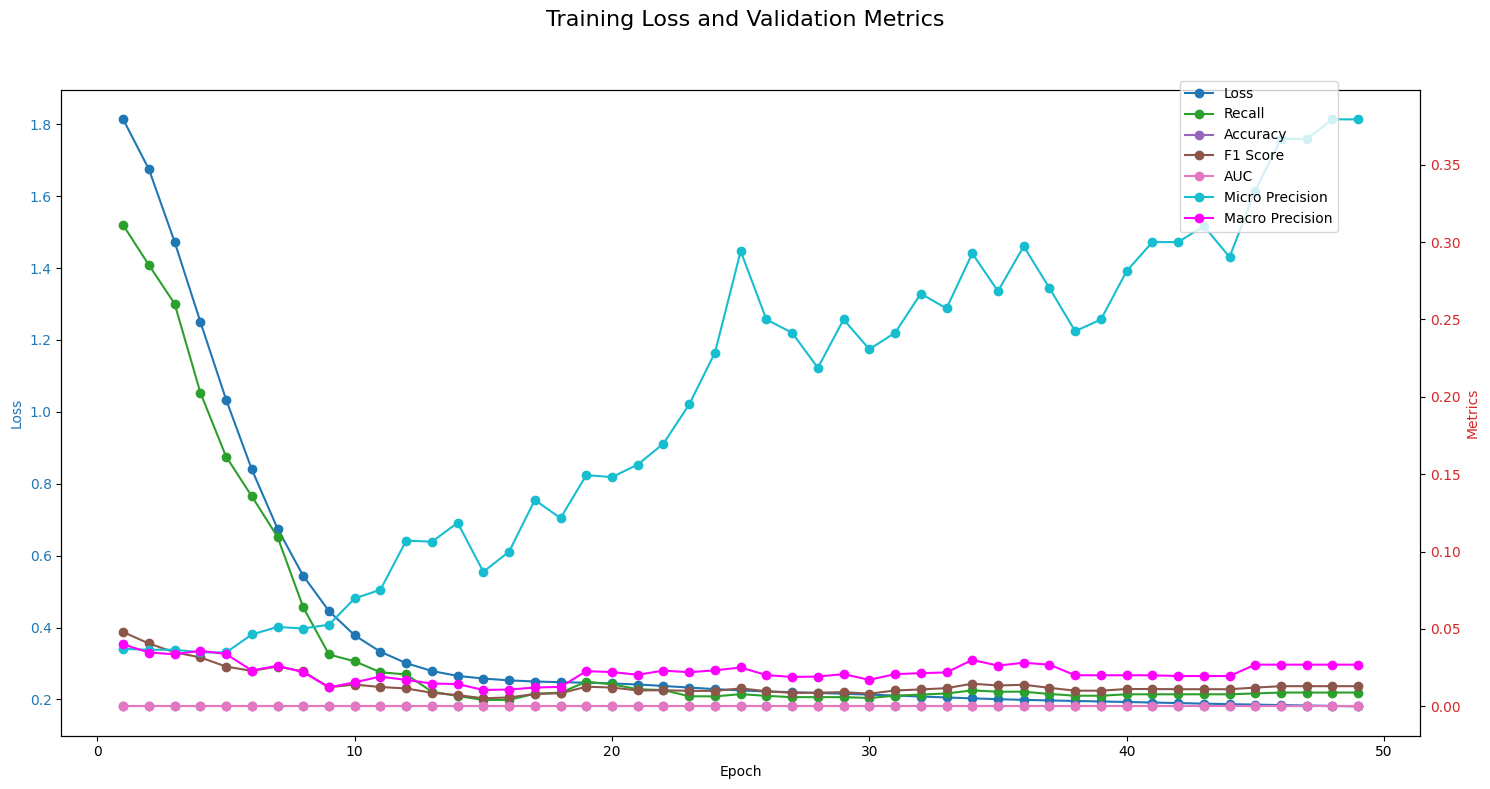

In [1]:
import os

from weighted_sum_precision.GNN_functions_patients_only import *
from weighted_sum_precision.GNN_SAGE import SAGE_MLC
from weighted_sum_precision.GNN_GCN import GCN_MLC


if __name__ == "__main__":
    num_Sample     = int(os.getenv('num_Sample', 250))  # Default to 10000 if not set
    num_Labels     = int(os.getenv('NUM_DISEASES', 203))  # Default to 100 if not set
    num_top_Labels = int(os.getenv('NUM_TOP_DISEASES', 203))  # Selecting the top most frequent labels
    disease_name   = os.getenv('DISEASE_FILE', f'DMPLB2')  # Default to 'sample/10000' if not set
    num_Meta_Path  = int(os.getenv('num_Meta_Path', 10))  # Default to 10
    num_epochs     = int(os.getenv('num_epochs', 50))    
    # ============================================================================

    saving_path = f'../Data/{num_Labels}_Diagnoses/{disease_name}/{num_Sample}/HGNN_data'

    GNN_model = SAGE_MLC
    with_SNF = False
    super_class = '' # '_sc'
    
    exp_name = f'{num_epochs}_epochs_SNF{super_class}'

    losses, val_metrics = main(saving_path, 
                               GNN_Model=GNN_model, 
                               num_epochs = num_epochs,
                               with_SNF = with_SNF,
                               exp_name = exp_name,
                               super_class = super_class, 
                               num_Meta_Path = num_Meta_Path,
                               top_k = 5,
                               num_D = num_top_Labels)

    plot_combined_metrics_and_loss(losses, val_metrics)

    if with_SNF:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps_SNF')
    else:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps')
